# Logistic Regression implementation without Scikit-learn


In [3]:
import numpy as np
import pandas as pd

from scipy.stats import norm
from sklearn.datasets import make_blobs

from matplotlib import pyplot
import matplotlib.pyplot as plt

import matplotlib.cm as cm
from random import sample

## Generating Some Example Data with 2 Features

In [4]:
heart_df = pd.read_csv("Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [8]:
X = heart_df[["Age", "Sex", "Chol"]].values
y = heart_df["Target"].map({'Yes':1, 'No':0}).values

In [9]:
n_feature = 3 # the number of features
n_components = 2 # the number of clusters

n=len(X) # the number of total samples

In [10]:
for i in range(5):
    print('x =', X[i, ], ', y =', y[i])

x = [ 63   1 233] , y = 0
x = [ 67   1 286] , y = 1
x = [ 67   1 229] , y = 1
x = [ 37   1 250] , y = 0
x = [ 41   0 204] , y = 0


In [11]:
# Just to show you what is inside it. We print the first 10 elements of this numpy array. 
y[:10]

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

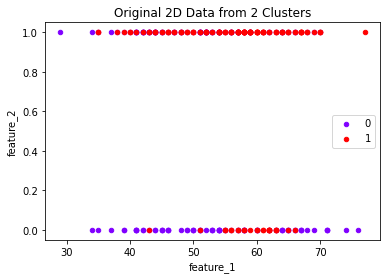

In [29]:
# scatter plot, data points annotated by different colors
df = pd.DataFrame(dict(feature_1=X[:,0], feature_2=X[:,1], label=y))


cluster_name = set(y)
colors = dict(zip(cluster_name, cm.rainbow(np.linspace(0, 1, len(cluster_name)))))
fig, ax = pyplot.subplots()

grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='feature_1', y='feature_2', label=key, color=colors[key].reshape(1,-1))
    
pyplot.title('Original 2D Data from {} Clusters'.format(n_components))
pyplot.show()

In [30]:

# Create Test/Train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [31]:
def sigmoid(z):
    """
    To convert continuous value into a range of 0 to 1

    I/P
    ----------
    z : Continuous value

    O/P
    -------
    Value in range between 0 to 1.
    """
    g = 1 / (1 + np.exp(-z))
    return g

In [32]:
def cost_function(X, y, weights):
    """
    Compute cost for logistic regression.

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray. 
        Dimension(m x n)
        m= number of training examples
        n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(1 x m)

    weights : 1D array of fitting parameters or weights. Dimension (1 x n)

    O/P
    -------
    cost : The cost of using theta as the parameter for linear regression to fit the data points in X and y.
    """
    m, n = X.shape
    x_dot_weights = X.dot(weights)

    cost = 1.0 / m * (-y.T.dot(np.log(sigmoid(x_dot_weights))) - (1 - y).T.dot(np.log(1 - sigmoid(x_dot_weights))))

    return cost

In [33]:
def gradient(X, y, weights):
    """
    Compute gradient for logistic regression.

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray. 
    Dimension(m x n)
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(1 x m)

    weights : 1D array of fitting parameters or weights. Dimension (1 x n)

    O/P
    -------
    grad: (numpy array)The gradient of the cost with respect to the parameters theta
    """
    m, n = X.shape
    x_dot_weights = X.dot(weights)

    grad = (1.0 / m )* (sigmoid(x_dot_weights) - y).T.dot(X)

    return grad

In [34]:
weights = np.zeros(n_feature)


cost = cost_function(X_train, y_train, weights)
grad = gradient(X_train, y_train, weights)

print(cost)
print(grad)

0.6931471805599453
[ 1.09090909 -0.02892562  7.17355372]


In [43]:
# Now we optimize it using Gradient Descent. 
num_iterations = 100
learnin_rate = 0.0001

cost_list = []

for i in range(0, num_iterations):
    
    cost = cost_function(X_train, y_train, weights)
    print("Cost is: ", cost)
    cost_list.append(cost)
    
    grad = gradient(X_train, y_train, weights)
    
    weights = weights - learnin_rate * grad    

Cost is:  0.6913950589278485
Cost is:  0.6913786323991394
Cost is:  0.6913623381885242
Cost is:  0.6913461752155146
Cost is:  0.6913301424084182
Cost is:  0.6913142387042689
Cost is:  0.6912984630487571
Cost is:  0.6912828143961601
Cost is:  0.6912672917092735
Cost is:  0.6912518939593432
Cost is:  0.6912366201259976
Cost is:  0.6912214691971805
Cost is:  0.6912064401690845
Cost is:  0.6911915320460844
Cost is:  0.6911767438406725
Cost is:  0.6911620745733925
Cost is:  0.6911475232727755
Cost is:  0.691133088975275
Cost is:  0.6911187707252049
Cost is:  0.6911045675746745
Cost is:  0.6910904785835266
Cost is:  0.6910765028192755
Cost is:  0.691062639357045
Cost is:  0.6910488872795072
Cost is:  0.6910352456768214
Cost is:  0.6910217136465743
Cost is:  0.6910082902937198
Cost is:  0.6909949747305197
Cost is:  0.690981766076485
Cost is:  0.6909686634583166
Cost is:  0.6909556660098486
Cost is:  0.6909427728719891
Cost is:  0.6909299831926645
Cost is:  0.6909172961267623
Cost is:  0.69090

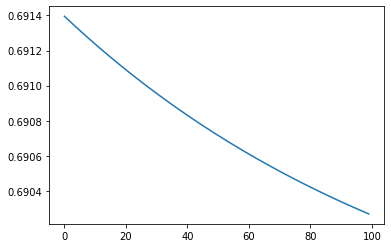

In [44]:
plt.plot(np.arange(num_iterations), cost_list)
plt.show()

In [45]:
def predict(weights, X):
    """
    Predict the class between 0 and 1 using learned logistic regression parameters weights.
    Using threshold value 0.5 to convert probability value to class value 

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray. 
        Dimension(m x n)
        m= number of training examples
        n= number of features (including X_0 column of ones)

    theta : 1D array of fitting parameters or weights. Dimension (1 x n)

    O/P
    -------
    Class type based on threshold
    """
    p = sigmoid(X.dot(weights)) >= 0.5
    return p.astype(int)

In [46]:
predictions = predict(weights, X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [47]:
y_test

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [48]:
# Correct Predictions are the cases that are equal. 

correct = np.sum(predictions == y_test)


print("Accuracy is: ", correct/y_test.size)


Accuracy is:  0.5409836065573771


In [49]:
from sklearn.metrics import classification_report

report = classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.54      0.97      0.70        33
           1       0.50      0.04      0.07        28

    accuracy                           0.54        61
   macro avg       0.52      0.50      0.38        61
weighted avg       0.52      0.54      0.41        61

